In [1]:
import numpy as np

_printing = 0

_kb = 1.380649e-23 #in SI units 
_re = 6371000      #in m
_g = 9.81          #in m/s^2

def loadMSIS(file):
    #reading msis data
    #get length, define data array size
    f = open(file, 'r')
    n_lines = len(f.readlines())
    data = np.zeros([n_lines - 15, 7])
    f.close()
    
    #get data into data array
    f = open(file, 'r')
    for i, line in enumerate(f.readlines()[15:]):
        data[i] = line.split()
    f.close()
        
    #print first few lines
    if _printing:
        f = open(file, 'r')
        for i in range(22):
            print(f.readline().replace('\n', ''))
            continue
        f.close()
    
    #more intuitive names and SI unit conversion
    global z_msis      
    global n_o1_msis   
    global n_n2_msis   
    global n_o2_msis   
    global mass_density
    global temp_n_msis 
    z_msis       = data[:, 0]*1e3      #[height in m]
    n_o1_msis    = data[:, 1]*1e6      #[number density in m^-3]
    n_n2_msis    = data[:, 2]*1e6      #[number density in m^-3]
    n_o2_msis    = data[:, 3]*1e6      #[number density in m^-3]
    mass_density = data[:, 4]*1e3      #[mass density (density in kg/m^3]
    temp_n_msis  = data[:, 5]          #[neutral temperature in K]
    
    number_density = np.sum(np.array([n_o1_msis, n_n2_msis, n_o2_msis]), 0)
    mean_molecular_mass = mass_density/number_density
    
    avarage_molecular_mass = mass_density/number_density
    
    #calculate scale height:
    global scale_height_msis
    scale_height_msis = _kb * temp_n_msis * (_re**2 + z_msis**2) / (avarage_molecular_mass * _g * _re**2)
    
    return [z_msis, n_o1_msis, n_n2_msis, n_o2_msis, mass_density, temp_n_msis, scale_height_msis]

ModelWeb Browser Results
msis model listing
Input parameters
year= 2005, month= 12, day= 12, hour=19.,
latitude= 69.59, longitude= 20., height= 100.
Prof. parameters: start= 80. stop= 700. step= 5.

 F10.7(daily) used:  90.2
 F10.7(3-month avg) used:  84.3
 ap(daily,0-3,3-6,6-9,9-12,12-33,33-59 h prior) used:
    12.1    15.0  15.0   7.0   5.0  20.6  11.3


                NUMBER DENSITIES          MASS DENSITY  TEMPERATURE
    H/KM     O/cm-3    N2/cm-3    O2/cm-3   m/g*cm-3     TN/K TEXO/K
    80.0   2.673E+09  1.818E+14  4.847E+13  1.117E-08   216.6  1037
    85.0   3.296E+10  8.566E+13  2.269E+13  5.255E-09   210.7  1037
    90.0   1.476E+11  3.966E+13  1.038E+13  2.430E-09   204.1  1037
    95.0   2.908E+11  1.790E+13  4.572E+12  1.096E-09   197.8  1037
   100.0   3.239E+11  7.724E+12  1.887E+12  4.732E-10   197.8  1037
   105.0   2.575E+11  3.221E+12  7.307E+11  1.974E-10   210.6  1037
   110.0   1.744E+11  1.359E+12  2.783E+11  8.329E-11   239.5  1037


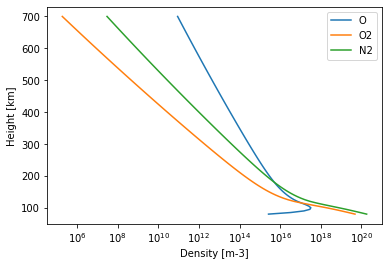

In [2]:
#visualization
if _printing:
    MSISFile = '/Users/ost051/Documents/PhD/Electron Precipitation/example/Meta-data/msis.txt'
    loadMSIS(MSISFile)
    
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(n_o1_msis, z_msis/1e3, label = 'O')
    plt.plot(n_o2_msis, z_msis/1e3, label = 'O2')
    plt.plot(n_n2_msis, z_msis/1e3, label = 'N2')
    plt.ylabel('Height [km]')
    plt.xlabel('Density [m-3]')
    plt.xscale('log')
    plt.legend()